# Data Science with Python

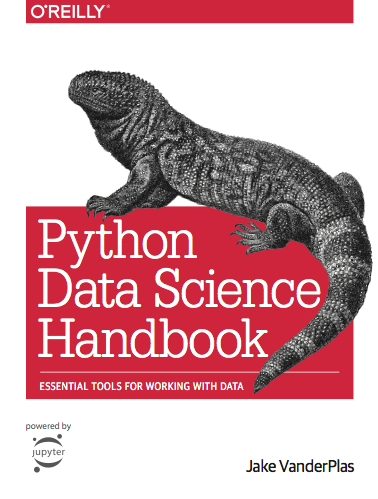

In [1]:
from IPython.display import Image
Image('https://jakevdp.github.io/PythonDataScienceHandbook/figures/PDSH-cover.png', retina= True)

Most of the material of this lecture is adopted from "Python Data Science Handbook - Essential Tools for Working with Data" By Jake VanderPlas,  O'Reilly Media.

Read the book entirety online at https://jakevdp.github.io/PythonDataScienceHandbook/

###### Before you start
- Update bitbucket repository in sourcetree (if something is not working use the command line) 
> `git fetch origin`     
> `git reset --hard origin/master`

- Update your docker image 
> `docker pull matjes/pds_201819`

- Start your docker image 
> `docker run -it --rm -p 8888:8888 -v "path/to/bitbucket":/notebooks/ matjes/pds_201819:latest`

## Exploratory data analysis (EDA)

### EDA: what and why?

EDA allows to
* better understand the data
* build an intuition about the data
* generate hypothesizes
* assess assumptions
* find insights

With EDA we can
* get comfortable with the data
* find magic features
* find mistakes or odd values

**Two ways of exploring data**

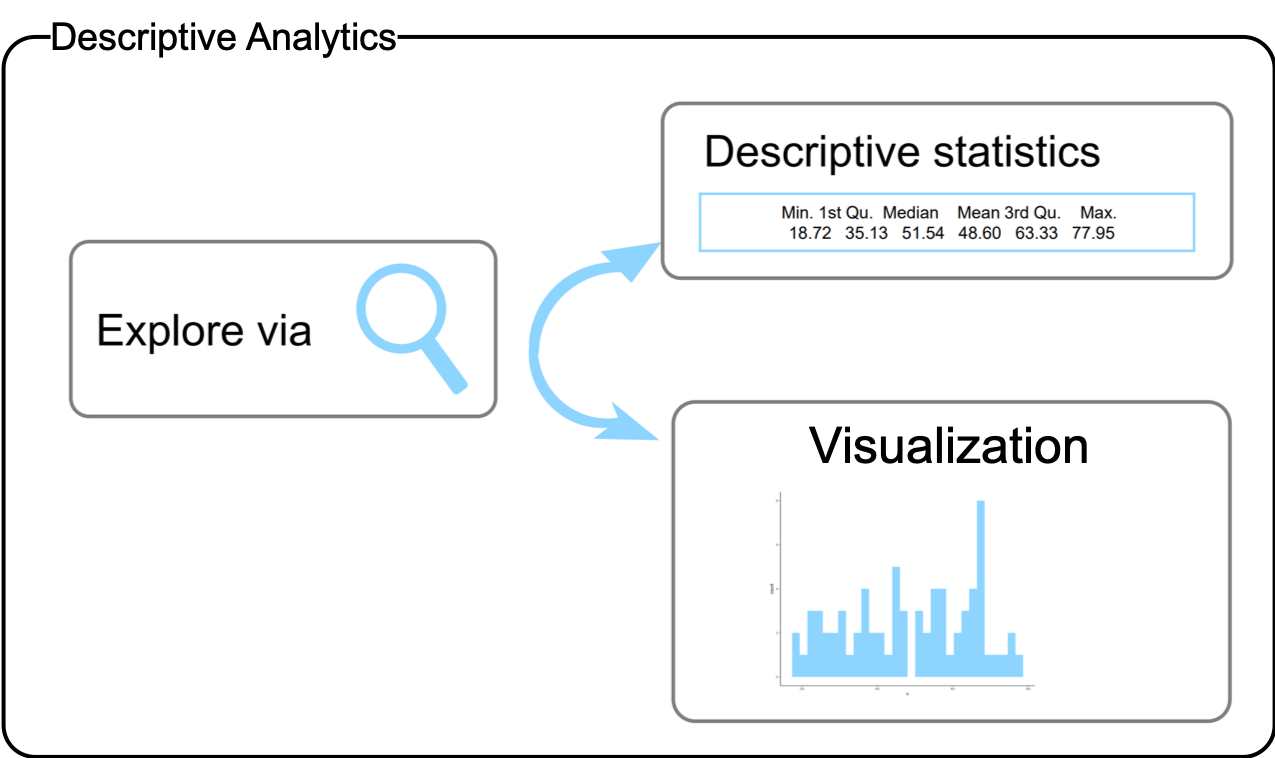

In [2]:
Image('Images/02/explore_data.png', retina= True)

### Building intuition about the data

+ Checking if the data is intuitive
+ Getting domain knowledge
+ Understanding how the data was generated

**Check if the data is intuitive**

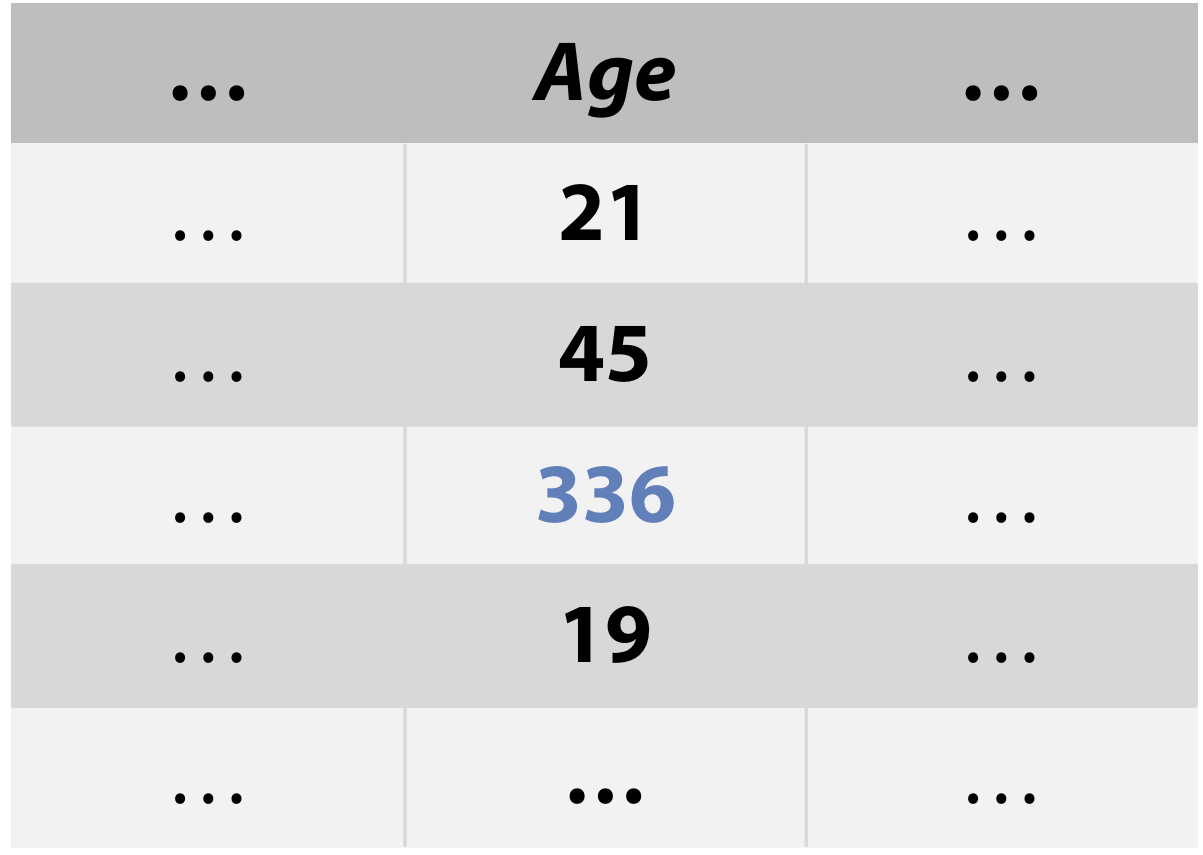

In [3]:
Image('Images/02/intuitive.png', width = 200)

+ Is *336* a Typo?
+ Or we misinterpret the feature and age 336 is normal

**Getting domain knowledge**

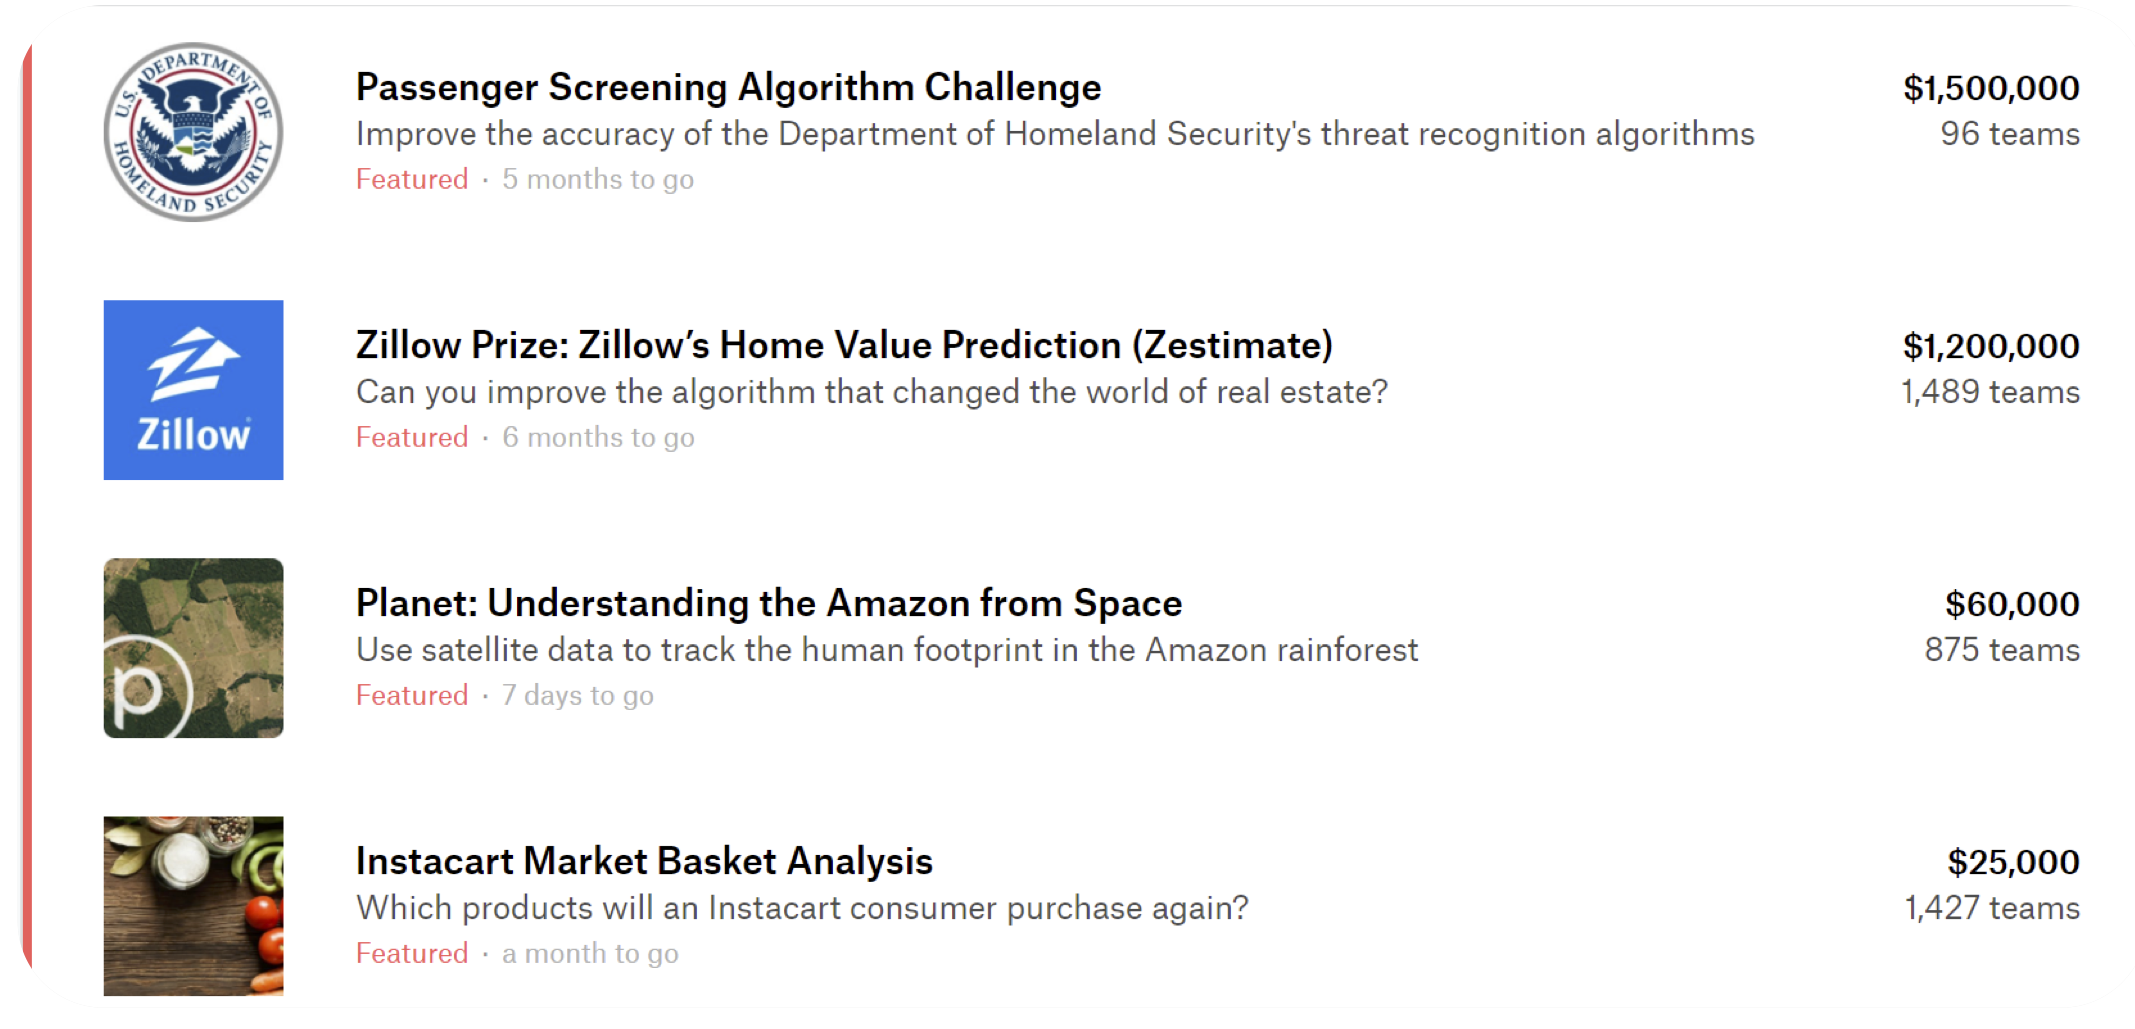

In [4]:
Image('Images/02/domain_knowledge.png', retina= True)

**Conclusion**

* Get **domain knowledge** helps to deeper understand the problem

* Check if the data is **intuitive** and agrees with domain knowledge

* Understand how the data was generated as it is crucial to set up a proper validation

 ### Visualizations for EDA
 
- Explore individual features
- Explore feature relations
    - Pairs
    - Groups
- Find odd values
- Better understand the data

##### Distributions

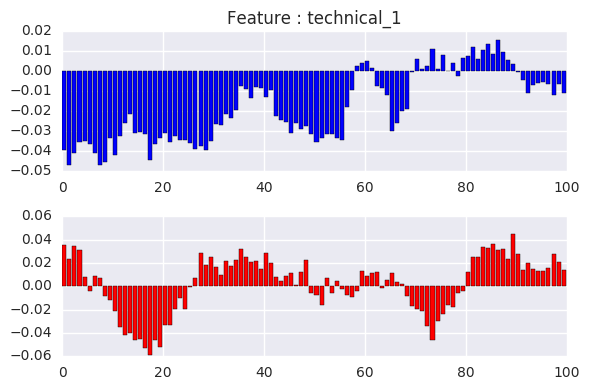

In [5]:
Image('Images/02/ts.png', retina= True)

##### Graphs

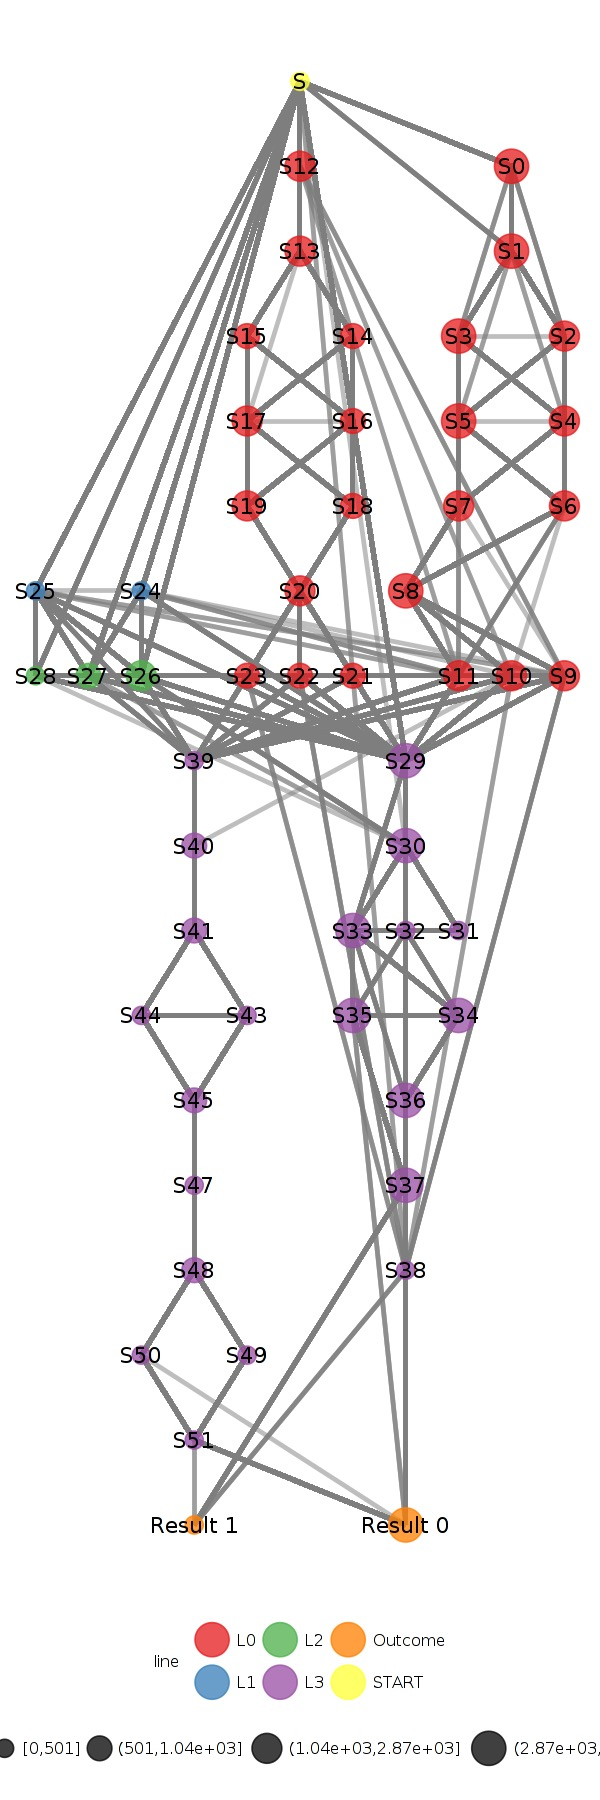

In [6]:
Image('Images/02/graph.png', retina= True)

##### Timeseries

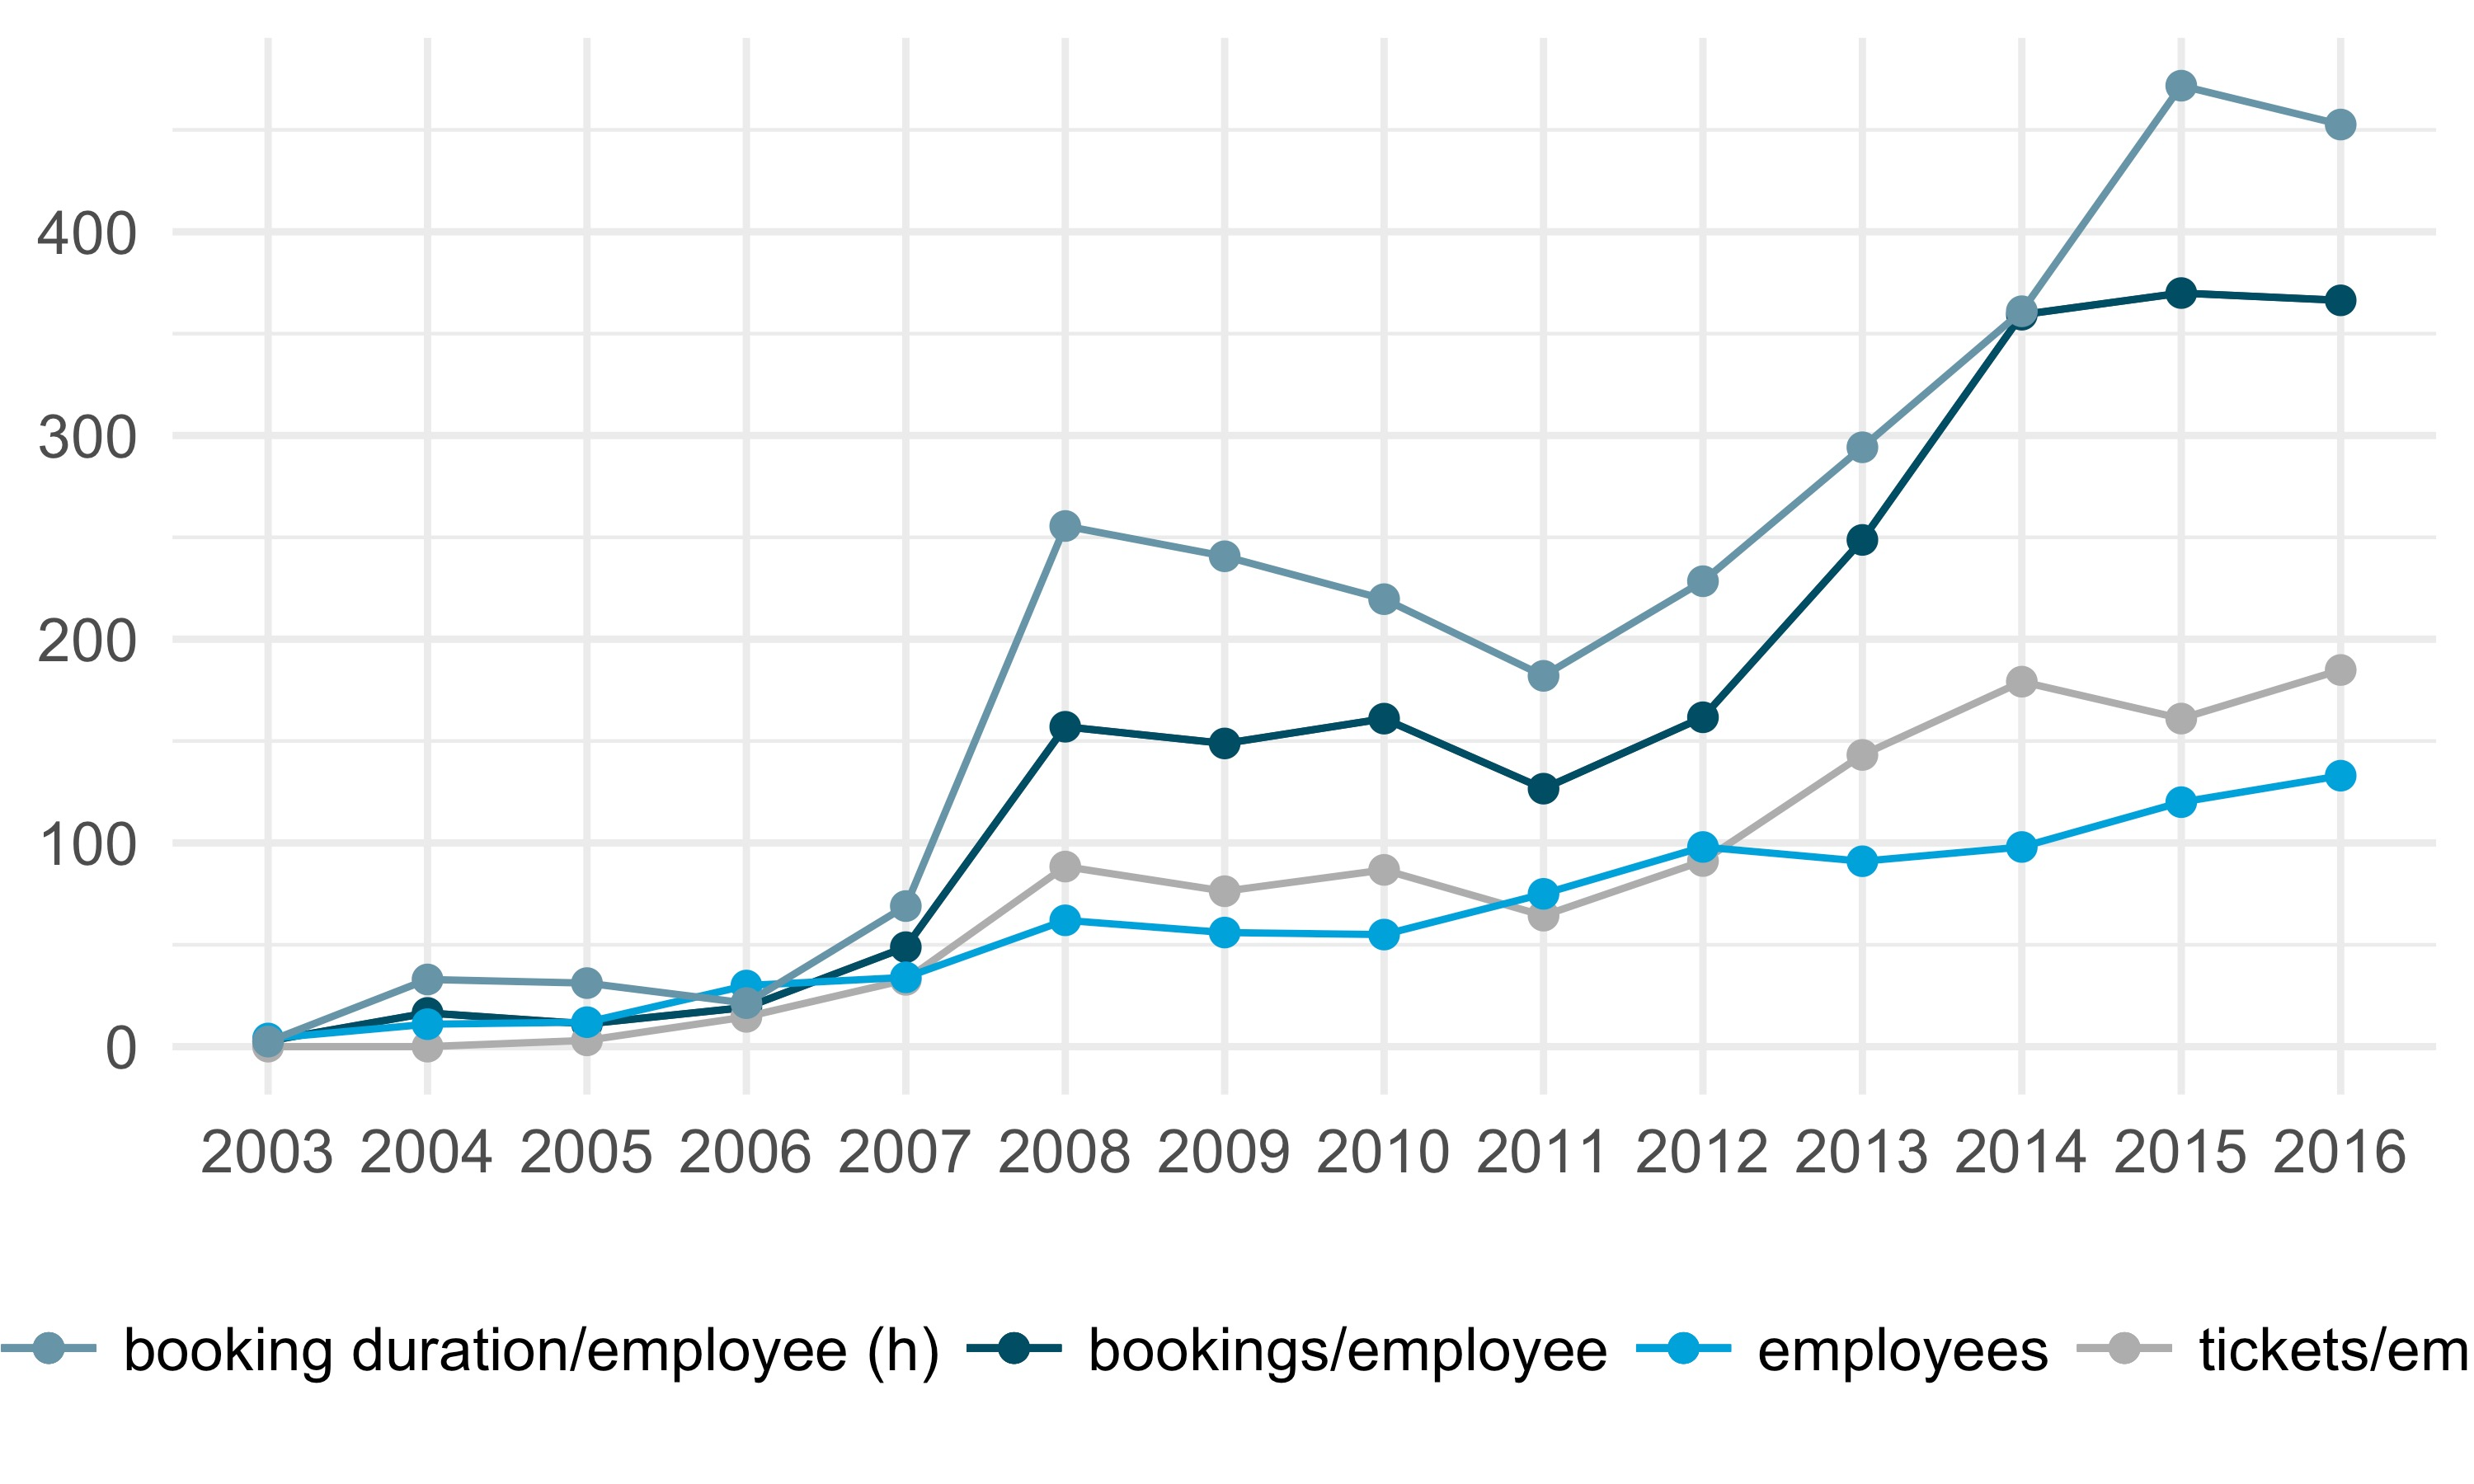

In [7]:
Image('Images/02/employee_bookings.png', retina= True)

##### Taxonomy for charts

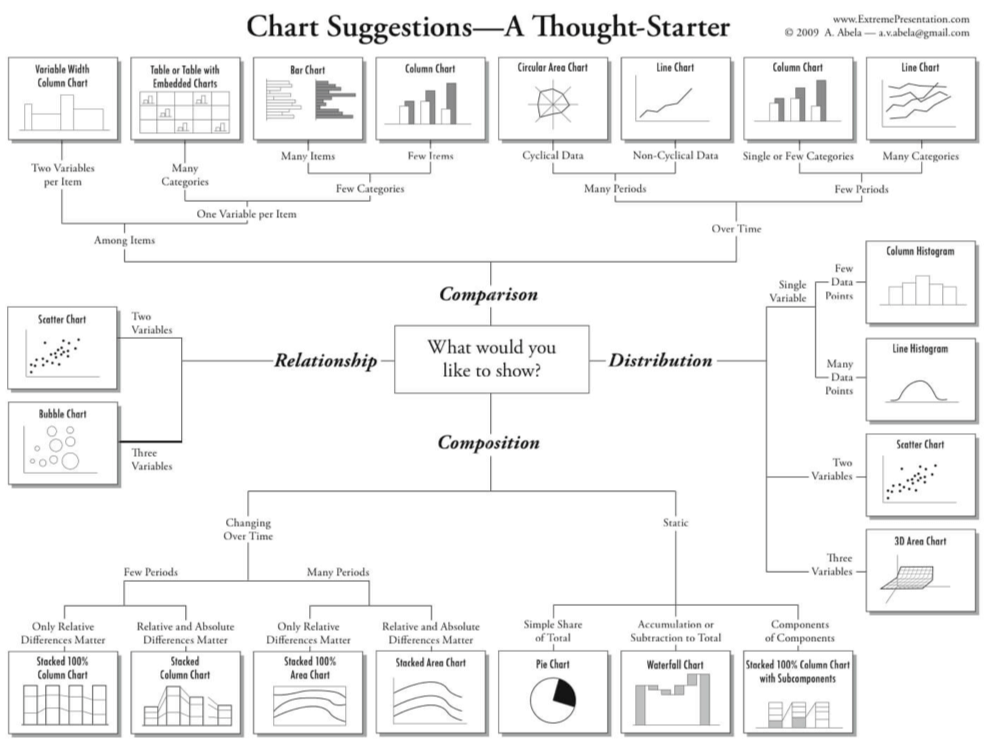

In [8]:
Image('Images/02/taxonomy.png', retina= True)

### Dataset cleaning and other things to check

* Dataset cleaning
    * Constant features
    * Duplicated features
    * NAs
    
* Other things to check
    * Duplicatedrows
    * Check if dataset is shuffled (Competitions!)
    
... and more!

### EDA check list

* Get domain knowledge
* Check if the data is intuitive
* Understand how the data was generated
* Explore individual features
* Explore pairs and groups
* Clean features up

## IPython: Beyond Normal Python

As well as being a useful interactive interface to Python, IPython also provides a number of useful syntactic additions to the language; we'll cover the most useful of these additions here. In addition, IPython is closely tied with the Jupyter project, which provides a browser-based notebook that is useful for development, collaboration, sharing, and even publication of data science results. The IPython notebook is actually a special case of the broader Jupyter notebook structure, which encompasses notebooks for Julia, R, and other programming languages. As an example of the usefulness of the notebook format, look no further than the page you are reading: the entire manuscript for this book was composed as a set of IPython notebooks.

* You can basically google everyting (we are using Python 3.x)

In [ ]:
import sys
sys.version

### Help and Documentation in IPython

Because finding help on an object is so common and useful, IPython introduces the ``?`` character as a shorthand for accessing this documentation and other relevant information:

In [ ]:
len?

In [ ]:
L = [1, 2, 3]
L?

### Exploring Modules with Tab-Completion

IPython's other useful interface is the use of the tab key for auto-completion and exploration of the contents of objects, modules, and name-spaces.
In the examples that follow, we'll use ``<TAB>`` to indicate when the Tab key should be pressed.

In [ ]:
L.<TAB>

**Tab completion when importing**

In [ ]:
from itertools import co<TAB>

### Miscellaneous Shortcuts
There are a few miscellaneous shortcuts useful to know:

| Keystroke                     | Action                                     |
|-------------------------------|--------------------------------------------|
| ``Ctrl-l``                    | Clear terminal screen                      |
| ``Ctrl-c``                    | Interrupt current Python command           |
| ``Ctrl-d``                    | Exit IPython session                       |

The Ctrl-c in particular can be useful when you inadvertently start a very long-running job.

### Magic Commands

Magic commands are designed to succinctly solve various common problems in standard data analysis.
Magic commands come in two flavors: *line magics*, which are denoted by a single ``%`` prefix and operate on a single line of input, and *cell magics*, which are denoted by a double ``%%`` prefix and operate on multiple lines of input.

###### Example: Timing Code Execution: ``%timeit``
Another example of a useful magic function is ``%timeit``, which will automatically determine the execution time of the single-line Python statement that follows it.
For example, we may want to check the performance of a list comprehension:

In [ ]:
%timeit L = [n ** 2 for n in range(1000)]

The benefit of ``%timeit`` is that for short commands it will automatically perform multiple runs in order to attain more robust results.
For multi line statements, adding a second ``%`` sign will turn this into a cell magic that can handle multiple lines of input.

Here's the equivalent construction with a ``for``-loop:

In [ ]:
%%timeit
L = []
for n in range(1000):
    L.append(n ** 2)

In [ ]:
%%timeit
L = [n ** 2 for n in range(1000)]

We can immediately see that list comprehensions are about 10% faster than the equivalent ``for``-loop construction in this case.

### Shell Commands in IPython

Any command that works at the command-line can be used in IPython by prefixing it with the ``!`` character.
For example, the ``ls``, ``pwd``, and ``echo`` commands can be run as follows:

In [ ]:
!ls

In [ ]:
!pwd

In [ ]:
!echo "printing from the shell"

## Introduction to NumPy

Efficient storage and manipulation of numerical arrays is absolutely fundamental to the process of doing data science.
We'll now take a look at the specialized tools that Python has for handling such numerical arrays: the NumPy package, and the Pandas package

In some ways, NumPy arrays are like Python's built-in ``list`` type, but NumPy arrays provide much more efficient storage and data operations as the arrays grow larger in size.
NumPy arrays form the core of nearly the entire ecosystem of data science tools in Python, so time spent learning to use NumPy effectively will be valuable no matter what aspect of data science interests you.

In [ ]:
import numpy
numpy.__version__

By convention, you'll find that most people in the SciPy/PyData world will import NumPy using np as an alias:

In [ ]:
import numpy as np

### Creating Arrays from Python Lists

First, we can use np.array to create arrays from Python lists:

In [ ]:
# integer array:
np.array([1, 4, 2, 5, 3])

Unlike Python lists, NumPy arrays can explicitly be multi-dimensional; here's one way of initializing a multidimensional array using a list of lists:

In [ ]:
# nested lists result in multi-dimensional arrays
np.array([range(i, i + 3) for i in [2, 4, 6]])

### Creating Arrays from Scratch
Especially for larger arrays, it is more efficient to create arrays from scratch using routines built into NumPy. Here are several examples:

In [ ]:
# Create a length-10 integer array filled with zeros
np.zeros(10, dtype=int)

In [ ]:
# Create a 3x5 floating-point array filled with ones
np.ones((3, 5), dtype=float)

In [ ]:
# Create a 3x5 array filled with 3.14
np.full((3, 5), 3.14)

In [ ]:
# Create an array filled with a linear sequence
# Starting at 0, ending at 20, stepping by 2
# (this is similar to the built-in range() function)
np.arange(0, 20, 2)

In [ ]:
# Create a 3x3 array of uniformly distributed
# random values between 0 and 1
np.random.random((3, 3))

### NumPy Array Attributes

In [ ]:
import numpy as np
np.random.seed(0)  # seed for reproducibility

x1 = np.random.randint(10, size=6)  # One-dimensional array
x2 = np.random.randint(10, size=(3, 4))  # Two-dimensional array
x3 = np.random.randint(10, size=(3, 4, 5))  # Three-dimensional array

In [ ]:
print("x3 ndim: ", x3.ndim)
print("x3 shape:", x3.shape)
print("x3 size: ", x3.size)

In [ ]:
print("dtype:", x3.dtype)

### Array Indexing: Accessing Single Elements

In [ ]:
x1

In [ ]:
x1[0]

In [ ]:
x1[4]

In [ ]:
x1[-1]

In [ ]:
x1[-2]

In [ ]:
x2

In [ ]:
x2[0, 0]

In [ ]:
x2[2, 0]

In [ ]:
x2[2, -1]

Values can also be modified using any of the above index notation:

In [ ]:
x2[0, 0] = 12
x2

### Computation on NumPy Arrays: vectorize operations

The following table lists the arithmetic operators implemented in NumPy:

| Operator	    | Equivalent ufunc    | Description                           |
|---------------|---------------------|---------------------------------------|
|``+``          |``np.add``           |Addition (e.g., ``1 + 1 = 2``)         |
|``-``          |``np.subtract``      |Subtraction (e.g., ``3 - 2 = 1``)      |
|``-``          |``np.negative``      |Unary negation (e.g., ``-2``)          |
|``*``          |``np.multiply``      |Multiplication (e.g., ``2 * 3 = 6``)   |
|``/``          |``np.divide``        |Division (e.g., ``3 / 2 = 1.5``)       |
|``//``         |``np.floor_divide``  |Floor division (e.g., ``3 // 2 = 1``)  |
|``**``         |``np.power``         |Exponentiation (e.g., ``2 ** 3 = 8``)  |
|``%``          |``np.mod``           |Modulus/remainder (e.g., ``9 % 4 = 1``)|

Additionally there are Boolean/bitwise operators; we will explore these in [Comparisons, Masks, and Boolean Logic](02.06-Boolean-Arrays-and-Masks.ipynb).

In [ ]:
x = np.arange(4)

In [ ]:
x

In [ ]:
x + 5

In [ ]:
x - 5

In [ ]:
x * 2

In [ ]:
x / 2

In [ ]:
x // 2 # floor division

### Aggregations: Min, Max, and Everything In Between

The following table provides a list of useful aggregation functions available in NumPy:

|Function Name      |   NaN-safe Version  | Description                                   |
|-------------------|---------------------|-----------------------------------------------|
| ``np.sum``        | ``np.nansum``       | Compute sum of elements                       |
| ``np.prod``       | ``np.nanprod``      | Compute product of elements                   |
| ``np.mean``       | ``np.nanmean``      | Compute mean of elements                      |
| ``np.std``        | ``np.nanstd``       | Compute standard deviation                    |
| ``np.var``        | ``np.nanvar``       | Compute variance                              |
| ``np.min``        | ``np.nanmin``       | Find minimum value                            |
| ``np.max``        | ``np.nanmax``       | Find maximum value                            |
| ``np.argmin``     | ``np.nanargmin``    | Find index of minimum value                   |
| ``np.argmax``     | ``np.nanargmax``    | Find index of maximum value                   |
| ``np.median``     | ``np.nanmedian``    | Compute median of elements                    |
| ``np.percentile`` | ``np.nanpercentile``| Compute rank-based statistics of elements     |
| ``np.any``        | N/A                 | Evaluate whether any elements are true        |
| ``np.all``        | N/A                 | Evaluate whether all elements are true        |

In [ ]:
M = np.random.random((3, 4))
print(M)

In [ ]:
M.sum()

In [ ]:
M.min(axis=0)

In [ ]:
M.max(axis=1)

### Comparisons, Masks, and Boolean Logic

NumPy also implements comparison operators such as ``<`` (less than) and ``>`` (greater than) as element-wise funtions.
The result of these comparison operators is always an array with a Boolean data type.
All six of the standard comparison operations are available:

| Operator	    | Equivalent ufunc    || Operator	   | Equivalent ufunc    |

|---------------|---------------------||---------------|---------------------|

|``==``         |``np.equal``         ||``!=``         |``np.not_equal``     |

|``<``          |``np.less``          ||``<=``         |``np.less_equal``    |

|``>``          |``np.greater``       ||``>=``         |``np.greater_equal`` |


In [ ]:
x = np.array([1, 2, 3, 4, 5])

In [ ]:
x < 3  # less than

In [ ]:
x > 3  # greater than

In [ ]:
x >= 3  # greater than or equal

In [ ]:
x != 3  # not equal

In [ ]:
x == 3  # equal

In [ ]:
(2 * x) == (x ** 2)

### Fast Sorting in NumPy: ``np.sort`` and ``np.argsort``

Although Python has built-in ``sort`` and ``sorted`` functions to work with lists, we won't discuss them here because NumPy's ``np.sort`` function turns out to be much more efficient and useful for our purposes.
By default ``np.sort`` uses an $\mathcal{O}[N\log N]$, *quicksort* algorithm, though *mergesort* and *heapsort* are also available. For most applications, the default quicksort is more than sufficient.

To return a sorted version of the array without modifying the input, you can use ``np.sort``:

In [ ]:
x = np.array([2, 1, 4, 3, 5])
np.sort(x)

In [ ]:
x.sort()
print(x)

In [ ]:
x = np.array([2, 1, 4, 3, 5])
i = np.argsort(x)
print(i)

In [ ]:
x[i]

## Data Manipulation with Pandas
As we saw, NumPy's ``ndarray`` data structure provides essential features for the type of clean, well-organized data typically seen in numerical computing tasks.
While it serves this purpose very well, its limitations become clear when we need more flexibility (e.g., attaching labels to data, working with missing data, etc.) and when attempting operations that do not map well to element-wise broadcasting (e.g., groupings, pivots, etc.), each of which is an important piece of analyzing the less structured data available in many forms in the world around us.
Pandas, and in particular its ``Series`` and ``DataFrame`` objects, builds on the NumPy array structure and provides efficient access to these sorts of "data munging" tasks that occupy much of a data scientist's time.

In [ ]:
import pandas
pandas.__version__

Just as we generally import NumPy under the alias np, we will import Pandas under the alias pd:

In [ ]:
import pandas as pd

### Introducing Pandas Objects

#### The Pandas Series Object

A Pandas ``Series`` is a one-dimensional array of indexed data.
It can be created from a list or array as follows:

In [ ]:
data = pd.Series([0.25, 0.5, 0.75, 1.0])
data

As we see in the output, the Series wraps both a sequence of values and a sequence of indices, which we can access with the values and index attributes. The values are simply a familiar NumPy array:

In [ ]:
data.values

In [ ]:
data.index

#### The Pandas DataFrame Object
The next fundamental structure in Pandas is the DataFrame. Like the Series object discussed in the previous section, the DataFrame can be thought of either as a generalization of a NumPy array, or as a specialization of a Python dictionary. We'll now take a look at each of these perspectives.

In [ ]:
pd.DataFrame(np.random.rand(3, 2),
             columns=['foo', 'bar'],
             index=['a', 'b', 'c'])

###  Data Indexing and Selection

#### Series as dictionary

Like a dictionary, the ``Series`` object provides a mapping from a collection of keys to a collection of values:

In [ ]:
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=['a', 'b', 'c', 'd'])
data

In [ ]:
data['b']

In [ ]:
'a' in data

In [ ]:
data.keys()

#### Indexers: loc, iloc
These slicing and indexing conventions can be a source of confusion. For example, if your Series has an explicit integer index, an indexing operation such as data[1] will use the explicit indices, while a slicing operation like data[1:3] will use the implicit Python-style index.

In [ ]:
data = pd.Series(['a', 'b', 'c'], index=[1, 3, 5])
data

In [ ]:
# explicit index when indexing
data[1]

In [ ]:
# implicit index when slicing
data[1:3]

In [ ]:
data.loc[1]

In [ ]:
data.loc[1:3]

In [ ]:
data.iloc[1]

In [ ]:
data.iloc[1:3]

#### Data Selection in DataFrame

Recall that a ``DataFrame`` acts in many ways like a two-dimensional or structured array, and in other ways like a dictionary of ``Series`` structures sharing the same index.
These analogies can be helpful to keep in mind as we explore data selection within this structure.

In [ ]:
area = pd.Series({'California': 423967, 'Texas': 695662,
                  'New York': 141297, 'Florida': 170312,
                  'Illinois': 149995})
pop = pd.Series({'California': 38332521, 'Texas': 26448193,
                 'New York': 19651127, 'Florida': 19552860,
                 'Illinois': 12882135})
data = pd.DataFrame({'area':area, 'pop':pop})
data

In [ ]:
data['area']

In [ ]:
data.area

In [ ]:
data.area is data['area']

In [ ]:
data.pop is data['pop']

In [ ]:
data['density'] = data['pop'] / data['area']
data

### Combining Datasets: Merge and Join

##### One-to-one joins

In [ ]:
df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'group': ['Accounting', 'Engineering', 'Engineering', 'HR']})
df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
                    'hire_date': [2004, 2008, 2012, 2014]})
display(df1, df2)

To combine this information into a single DataFrame, we can use the pd.merge() function:

In [ ]:
df3 = pd.merge(df1, df2)
df3

##### Many-to-one joins
Many-to-one joins are joins in which one of the two key columns contains duplicate entries. For the many-to-one case, the resulting DataFrame will preserve those duplicate entries as appropriate. Consider the following example of a many-to-one join:

In [ ]:
df4 = pd.DataFrame({'group': ['Accounting', 'Engineering', 'HR'],
                    'supervisor': ['Carly', 'Guido', 'Steve']})
display(df3, df4)

In [ ]:
pd.merge(df3, df4)

### Aggregation and Grouping
An essential piece of analysis of large data is efficient summarization: computing aggregations like ``sum()``, ``mean()``, ``median()``, ``min()``, and ``max()``, in which a single number gives insight into the nature of a potentially large dataset.
In this section, we'll explore aggregations in Pandas, from simple operations akin to what we've seen on NumPy arrays, to more sophisticated operations based on the concept of a ``groupby``.

The following table summarizes some other built-in Pandas aggregations:

| Aggregation              | Description                     |
|--------------------------|---------------------------------|
| ``count()``              | Total number of items           |
| ``first()``, ``last()``  | First and last item             |
| ``mean()``, ``median()`` | Mean and median                 |
| ``min()``, ``max()``     | Minimum and maximum             |
| ``std()``, ``var()``     | Standard deviation and variance |
| ``mad()``                | Mean absolute deviation         |
| ``prod()``               | Product of all items            |
| ``sum()``                | Sum of all items                |

These are all methods of ``DataFrame`` and ``Series`` objects.

In [ ]:
rng = np.random.RandomState(42)
ser = pd.Series(rng.rand(5))
ser

In [ ]:
ser.sum()

In [ ]:
ser.mean()

In [ ]:
df = pd.DataFrame({'A': rng.rand(5),
                   'B': rng.rand(5)})
df

In [ ]:
df.mean()

In [ ]:
df.mean(axis='columns')

###### GroupBy: Split, Apply, Combine
Simple aggregations can give you a flavor of your dataset, but often we would prefer to aggregate conditionally on some label or index: this is implemented in the so-called groupby operation. The name "group by" comes from a command in the SQL database language, but it is perhaps more illuminative to think of it in the terms first coined by Hadley Wickham of Rstats fame: split, apply, combine.

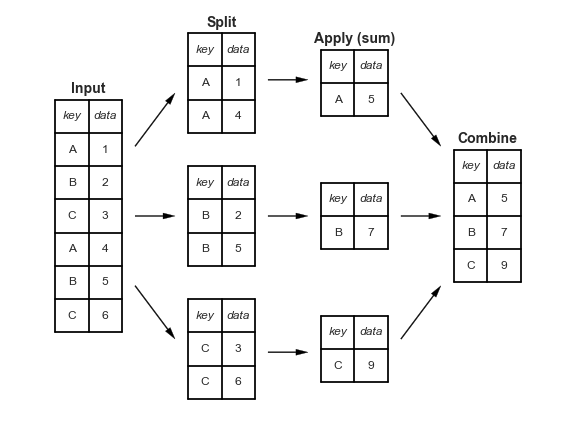

In [9]:
Image('https://github.com/jakevdp/PythonDataScienceHandbook/raw/master/notebooks/figures/03.08-split-apply-combine.png', retina=True)

In [ ]:
import seaborn as sns
planets = sns.load_dataset('planets')
planets.shape

In [ ]:
planets.head()

In [ ]:
planets.dropna().describe()

##### Column indexing

The ``GroupBy`` object supports column indexing in the same way as the ``DataFrame``, and returns a modified ``GroupBy`` object.
For example:

In [ ]:
planets.groupby('method')

In [ ]:
planets.groupby('method')['orbital_period']

In [ ]:
planets.groupby('method')['orbital_period'].median()

## Visualization with Matplotlib

Matplotlib is a multi-platform data visualization library built on NumPy arrays, and designed to work with the broader SciPy stack. 
One of Matplotlib’s most important features is its ability to play well with many operating systems and graphics backends.
Matplotlib supports dozens of backends and output types, which means you can count on it to work regardless of which operating system you are using or which output format you wish.
In recent years, however, the interface and style of Matplotlib have begun to show their age.
Newer tools like ggplot and ggvis in the R language, along with web visualization toolkits based on D3js and HTML5 canvas, often make Matplotlib feel clunky and old-fashioned.
Still, we cannot ignore Matplotlib's strength as a well-tested, cross-platform graphics engine.

### General Matplotlib Tips

##### Importing Matplotlib

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

#### Setting Styles
​
We will use the ``plt.style`` directive to choose appropriate aesthetic styles for our figures.
Here we will set the ``classic`` style, which ensures that the plots we create use the classic Matplotlib style:

In [ ]:
plt.style.use('classic')

### Plotting from an IPython notebook

Plotting interactively within an IPython notebook can be done with the ``%matplotlib`` command, and works in a similar way to the IPython shell.
In the IPython notebook, you also have the option of embedding graphics directly in the notebook, with two possible options:

- ``%matplotlib notebook`` will lead to *interactive* plots embedded within the notebook
- ``%matplotlib inline`` will lead to *static* images of your plot embedded in the notebook

We will generally opt for ``%matplotlib inline``

In [ ]:
import numpy as np
x = np.linspace(0, 10, 100)

fig = plt.figure()
plt.plot(x, np.sin(x), '-')
plt.plot(x, np.cos(x), '--');

If you are using Matplotlib from within a script, the function ``plt.show()`` is your friend.
``plt.show()`` starts an event loop, looks for all currently active figure objects, and opens one or more interactive windows that display your figure or figures.

### Saving Figures to File

One nice feature of Matplotlib is the ability to save figures in a wide variety of formats.
Saving a figure can be done using the ``savefig()`` command.
For example, to save the previous figure as a PNG file, you can run this:

In [ ]:
fig.savefig('my_figure.png')

In [ ]:
!ls -lh my_figure.png

### Customizing Plot Legends

In [ ]:
x = np.linspace(0, 10, 1000)
fig, ax = plt.subplots()
ax.plot(x, np.sin(x), '-b', label='Sine')
ax.plot(x, np.cos(x), '--r', label='Cosine')
ax.axis('equal')
leg = ax.legend();